# Лабораторная 5
# Решающие деревья и случайные леса

## Лабораторная 5.2. Применение ансамблевых моделей на базе решающих деревьев в задачах классификации

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 1.
Решим задачу классификации  больных методом случайного леса.

1. Провеведем исследование качества модели от глубины используемых деревьев и отрисуем зависимость на графике
2. Проведем исследование качества модели от количества подаваемых на дерево признаков и отрисуем зависимость на графике
3. Проведем исследование качества модели от числа деревьев и отрисуем зависмость на графике, а также дополним  график данными  о времени обучения.

В качестве измерителя качества модели возьмем ```f1_score```

Подключим наш датасет - ```diabetes```.

In [18]:
from sklearn.metrics import f1_score

data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv', sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Исследуем зависимость глубины деревьев от меры ```f1```

In [20]:
from sklearn.ensemble import RandomForestClassifier

f1_scores_depthes = list()
depthes = (3, 7, 10, 15, 20, 30, 47, 70, 90, 110)
for depth in depthes:
    model = RandomForestClassifier(max_depth=depth).fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1_scores_depthes.append(f1_score(y_test, predicted))

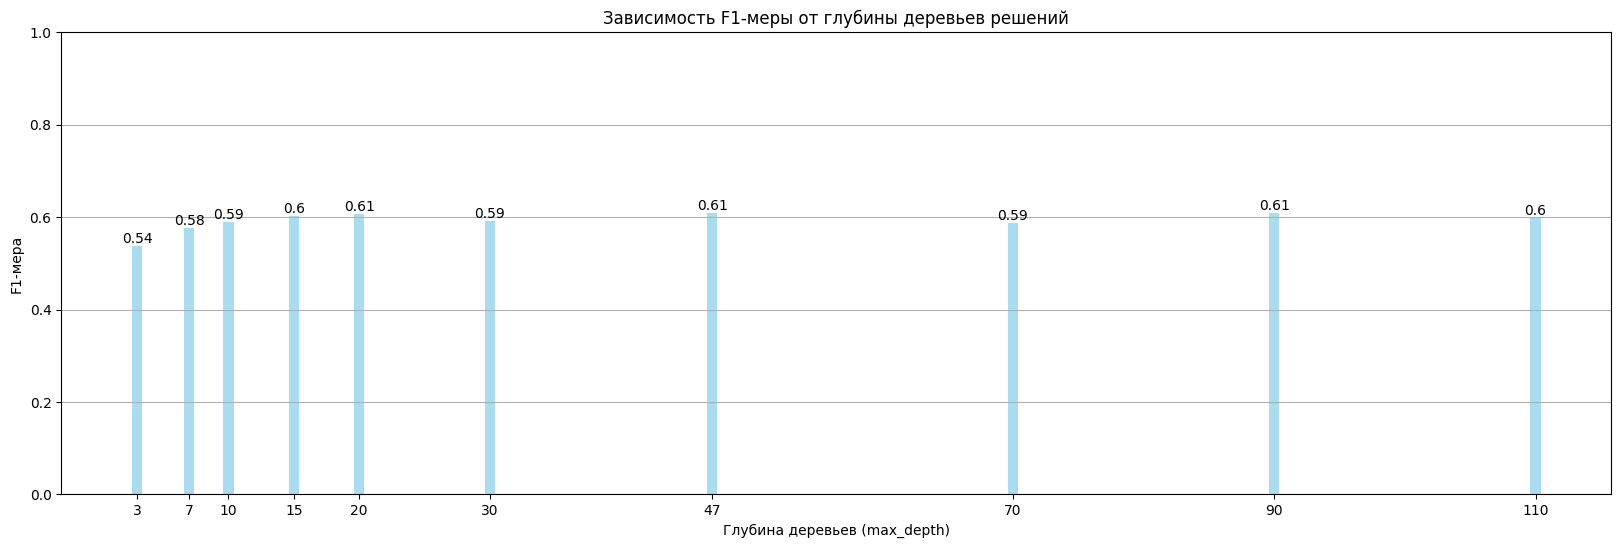

In [21]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(depthes, f1_scores_depthes, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от глубины деревьев решений')
plt.xlabel('Глубина деревьев (max_depth)')
plt.ylabel('F1-мера')
plt.xticks(depthes)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Видим, что один из лучших показателей при ```max_depth = 47``` - ```0.61```, также показатели при ```max_depth = 20``` и ```max_depth = 90``` - ```0.61```. В целом эти показатели не особо хорошие и не превосходят показатели обычного решающего дерева, где максимум был в ```0.62``` при ```max_depth = 12```

Исследуем зависимость признаков деревьев от меры ```f1```

In [22]:
f1_scores_features = list()
features = (1, 2, 3, 4, 5, 6, 7, 8)
for feature in features:
    model = RandomForestClassifier(max_features=feature).fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1_scores_features.append(f1_score(y_test, predicted))

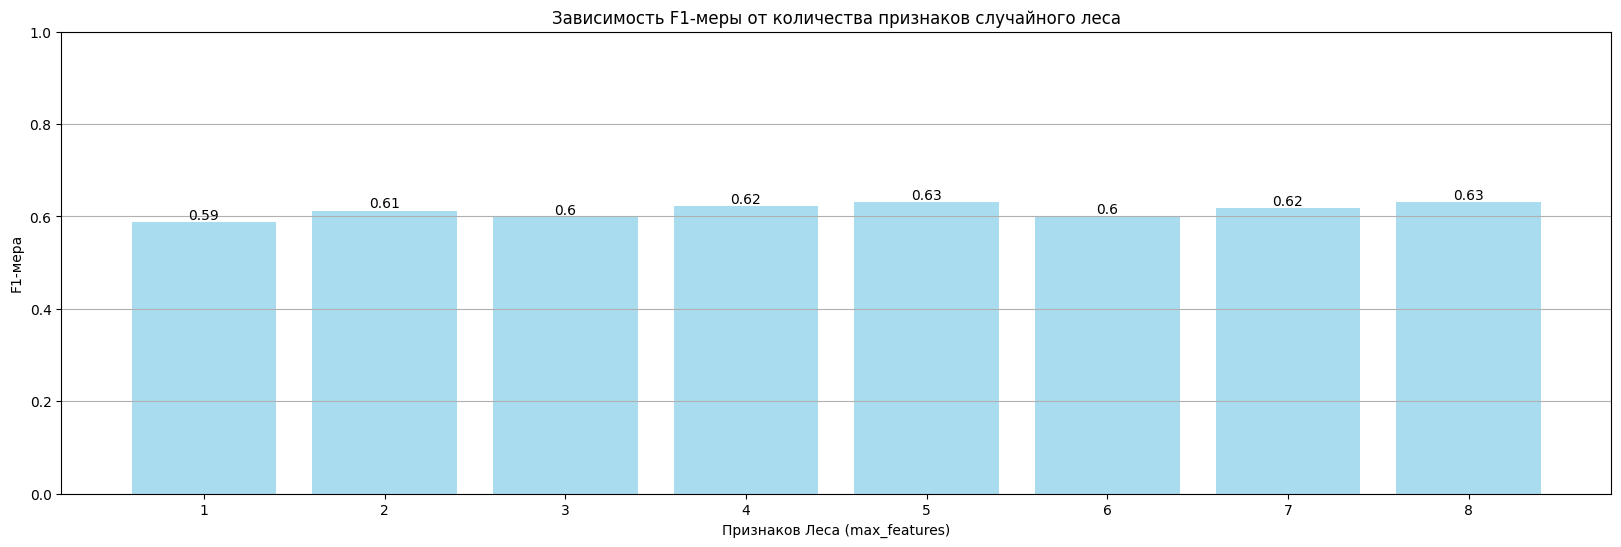

In [23]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(features, f1_scores_features, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от количества признаков случайного леса')
plt.xlabel('Признаков Леса (max_features)')
plt.ylabel('F1-мера')
plt.xticks(features)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Мы обучили модели для разного количества признаков и результаты получились почти равные. 

Что интересно - хорошей точностью относительно моделей с другим количеством признаков обладает модель с максимальным количеством признаков равным всего 2.

Тем не менее мы не добиваемся хороших показателей точности.

Исследуем зависимость количества деревьев от меры ```f1``` с измерением времени обучения

In [40]:
from time import time

f1_scores_estimators = list()
time_estimators = list()
estimators = (3, 7, 10, 15, 20, 30, 47, 60, 80, 100)
for estimator in estimators:
    start = time()
    model = RandomForestClassifier(n_estimators=estimator).fit(X_train, y_train)
    estimator_time = time() - start
    predicted = model.predict(X_test)
    f1_scores_estimators.append(f1_score(y_test, predicted))
    time_estimators.append(estimator_time)

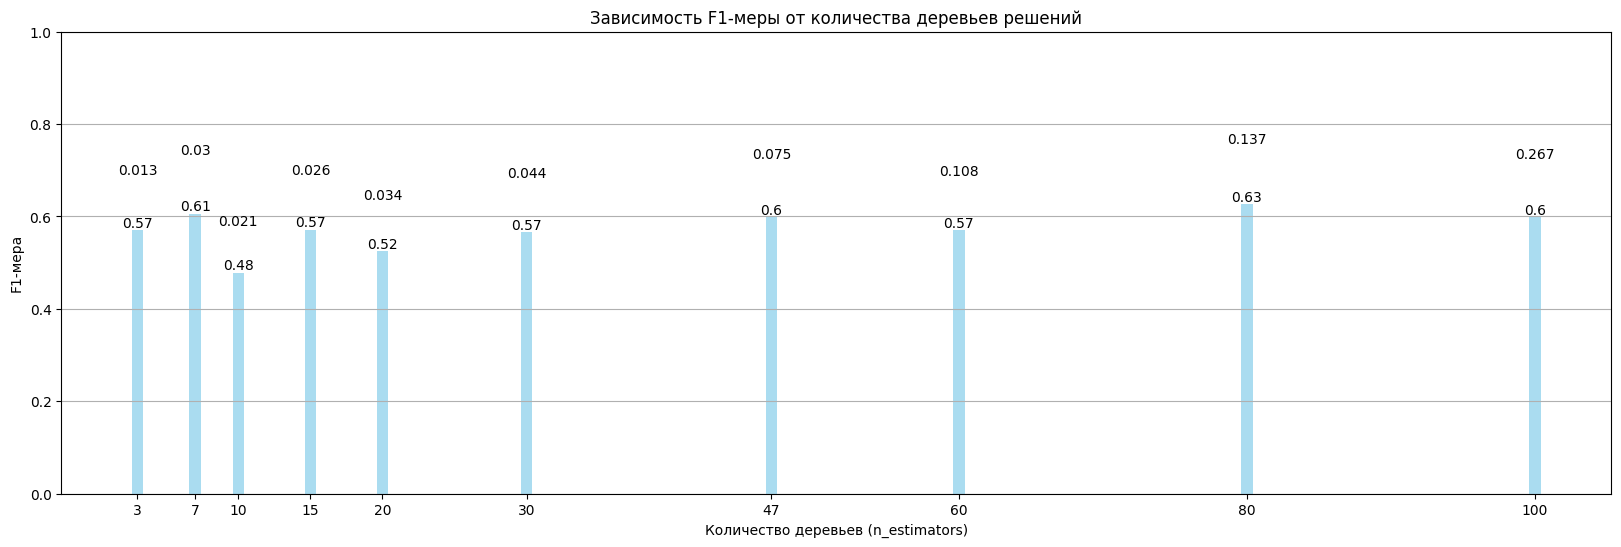

In [41]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(estimators, f1_scores_estimators, color='skyblue', alpha=0.7)
    
# Добавление значений времени и f1 над столбцами
for i in range(len(bars)):
    yval = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yval + yval/5, round(time_estimators[i], 3), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от количества деревьев решений')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('F1-мера')
plt.xticks(estimators)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

Итак, мы видим, что максимальная точность достигнута при ```n_estimators = 80``` достигнут за ```0.137``` сек. значения ```0.63```. Видим, что чем больше количества деревьев в лесу, тем дольше выполнятеся обучение, так при количестве 100 выполнение обучение заняло четверть секунды.

Попробуем взять лучшие гиперпараметры и посмотреть на ```f1_score``` и ```Roc-Auc``` нашей модели.

In [42]:
from sklearn.metrics import roc_curve, auc

model_best_parametrs = RandomForestClassifier(n_estimators=80, max_features=8, max_depth=20).fit(X_train, y_train)

f1_score =  0.64
ROC-AUC =  0.7327731092436975


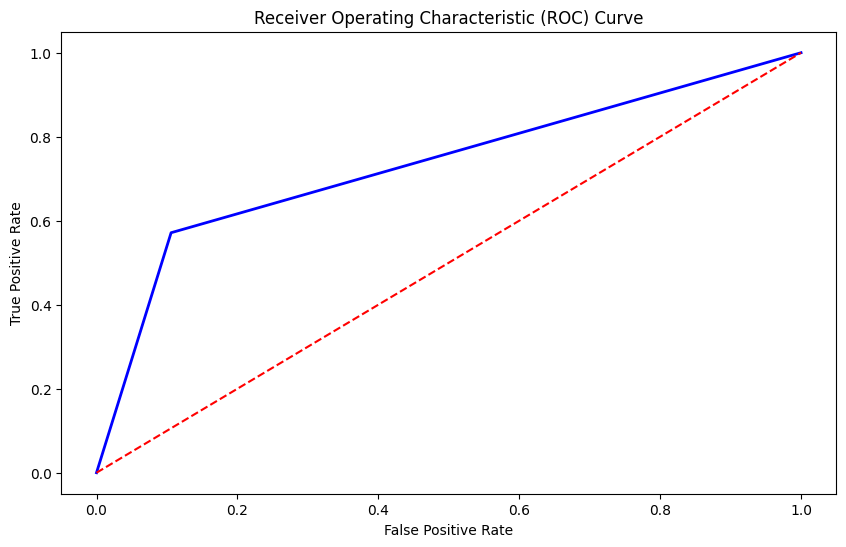

In [44]:
y_pred_best_params = model_best_parametrs.predict(X_test)

f1_score_best_params = f1_score(y_test, y_pred_best_params)

# Вычисление FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_params)

# Вычисление площади под ROC-кривой
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('f1_score = ', f1_score_best_params)
print('ROC-AUC = ', roc_auc)

Как и следовало ожидать, показатель не стал равным единице, он равен ```f1_score = 0.64```, чуть выше, чем моделях с одним гиперпараметром. Показатель ```Roc-Auc = 0.73```, что лучше чем в случае решающего дерева (```0.70```), однако недостаточно для того, чтобы считать модель хорошей

## 2.
Решить задачу классификации с использованием ```XGBoost```. 

Исследовать время обучения, качество полученных результатов. 

Сравнить с данными полученными в п.1 и сделать выводы.

```XGBoost``` имеет ```boosters```: ```gbtree```, ```gblinear``` и ```dart```. Параметр по умолчанию - ```gbtree```. ```dart``` - аналогичная версия, в которой используются методы исключения, чтобы избежать переобучения, а ```gblinear``` использует обобщенную линейную регрессию вместо деревьев решений. 

In [45]:
from xgboost import XGBClassifier

In [46]:
f1_scores_depthes = list()
depthes = (1, 3, 7, 10, 15, 20, 30, 47, 70, 90, 110)
for depth in depthes:
    model = XGBClassifier(max_depth=depth).fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1_scores_depthes.append(f1_score(y_test, predicted))

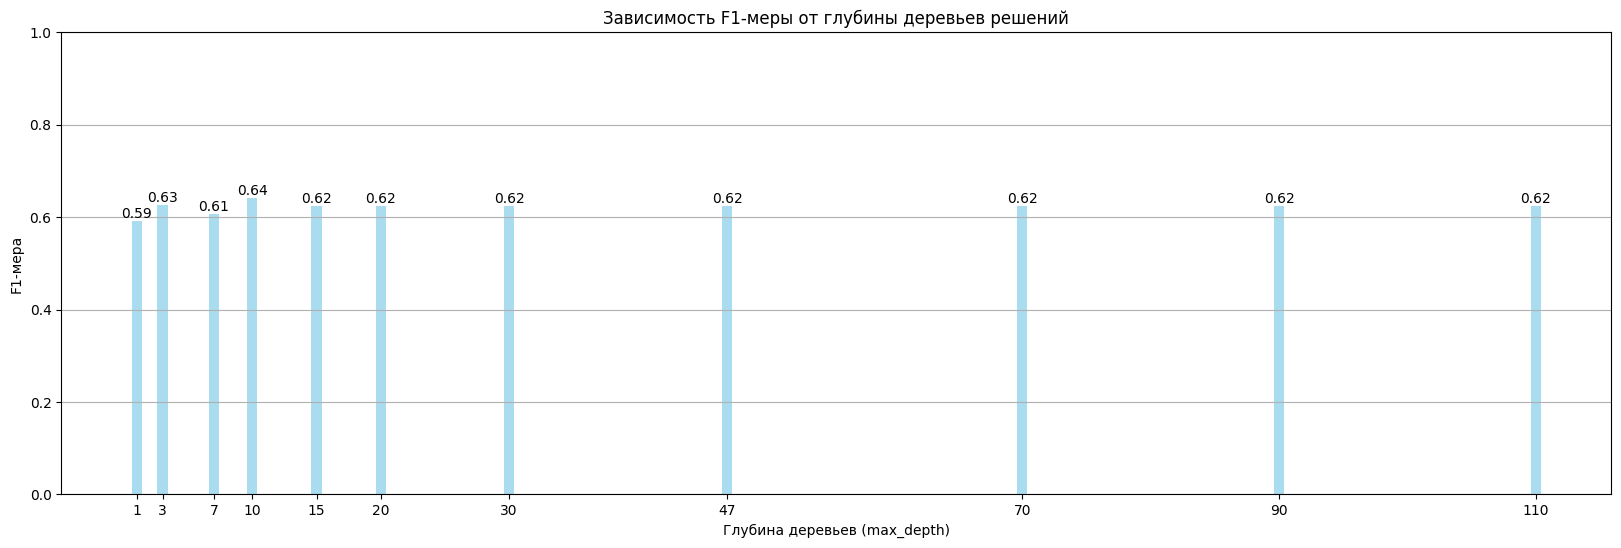

In [47]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(depthes, f1_scores_depthes, color='skyblue', alpha=0.7)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от глубины деревьев решений')
plt.xlabel('Глубина деревьев (max_depth)')
plt.ylabel('F1-мера')
plt.xticks(depthes)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

В отличие от ```Случайного леса``` глубина деревьев почти не влияет на точность и даже при максимальной глубине 3 модель показывает один из лучших результатов ```0.63```

Параметр ```max_features``` не используется в ```XGBoost```, поэтому переходим сразу к ```n_estimators```

In [48]:
from time import time

f1_scores_estimators = list()
time_estimators = list()
estimators = (3, 7, 10, 15, 20, 30, 47, 60, 80, 100)
for estimator in estimators:
    start = time()
    model = XGBClassifier(n_estimators=estimator).fit(X_train, y_train)
    estimator_time = time() - start
    predicted = model.predict(X_test)
    f1_scores_estimators.append(f1_score(y_test, predicted))
    time_estimators.append(estimator_time)

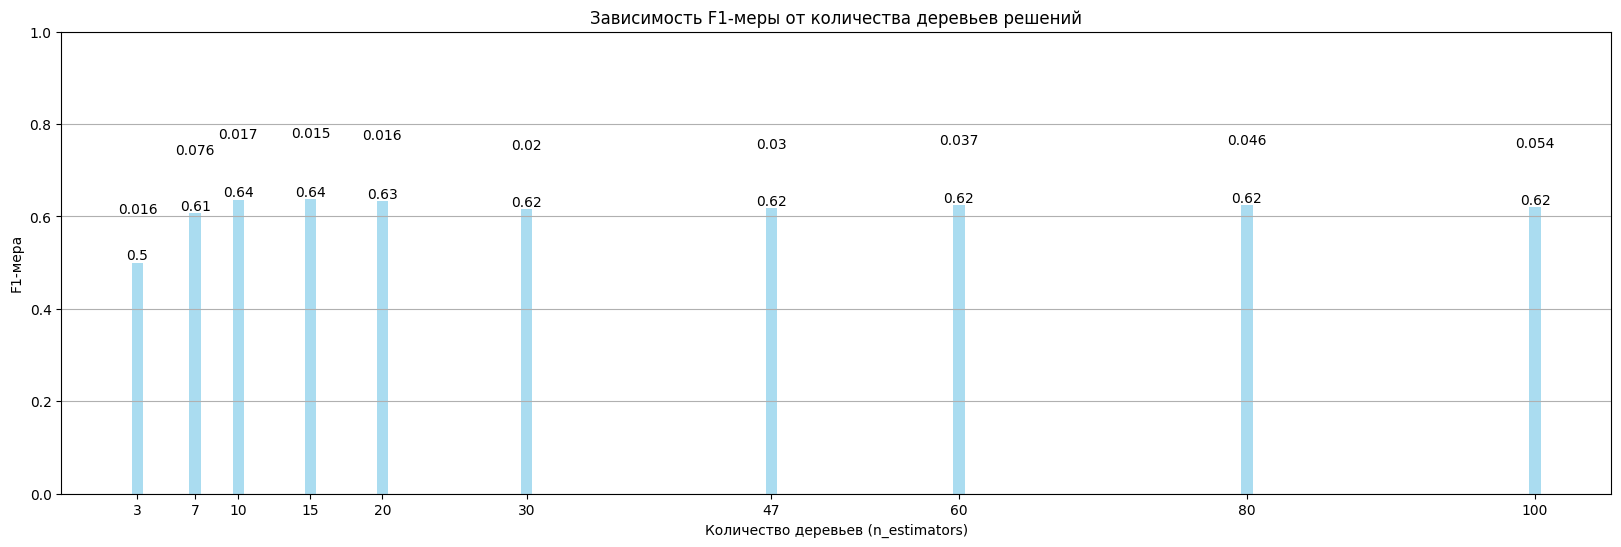

In [49]:
# Построение гистограммы
plt.figure(figsize=(20, 6))
bars = plt.bar(estimators, f1_scores_estimators, color='skyblue', alpha=0.7)
    
# Добавление значений времени и f1 над столбцами
for i in range(len(bars)):
    yval = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yval + yval/5, round(time_estimators[i], 3), ha='center', va='bottom')

# Настройка графика
plt.title('Зависимость F1-меры от количества деревьев решений')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('F1-мера')
plt.xticks(estimators)  # Установка меток по оси X
plt.ylim(0, 1)  # Установка пределов по оси Y (если F1-мера от 0 до 1)
plt.grid(axis='y')

При проверке зависимости ```f1``` от количества ```estimators``` заметно сильное отличие от моделей ```Случайного леса```: точности моделей почти равна между собой, но только еще ближе друг к другу, но самое примечательное - время работы очень малое как для малого количества ```estimators```, так и для большого, и оно не зависит от ```estimators```. Скорость работы ```XGBoost``` быстрее ```Случайного леса``` в ```5.95``` раз без потери точности, что делает его более эффективной моделью.

Возьмем конкретную модель ```XGBoost``` и проверим ее на ```f1_score``` и ```Roc-Auc```

f1_score =  0.6666666666666666
ROC-AUC =  0.7508403361344538


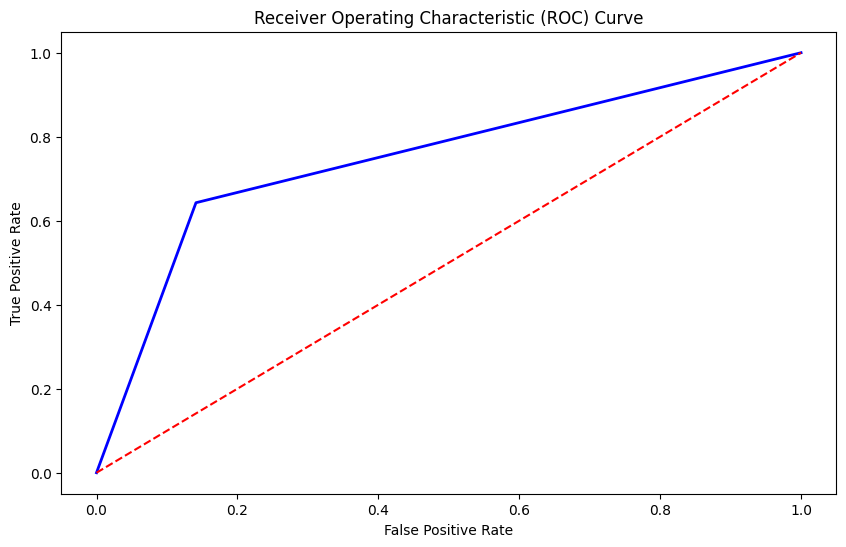

In [50]:
model_best_parametrs = XGBClassifier(n_estimators=13, max_depth=10).fit(X_train, y_train)
y_pred_best_params = model_best_parametrs.predict(X_test)

f1_score_best_params = f1_score(y_test, y_pred_best_params)

# Вычисление FPR и TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_params)

# Вычисление площади под ROC-кривой
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('f1_score = ', f1_score_best_params)
print('ROC-AUC = ', roc_auc)

Результат - ```XGBoost``` поставил рекорд по точности с ```f1_score = 0.66``` и ```Roc-Auc =  0.75```. Данная модель показала себя лучше и по скорости, и по точности среди двух асамблей, которые мы рассмотрели.

На втором месте по точности оказался ```Случайный Лес``` с ```f1_score = 0.64``` и ```Roc-Auc =  0.73```.

И на третьем ```Решающее дерево``` с ```f1_score = 0.62``` и ```Roc-Auc =  0.70```.

Мы не получили точную модель, но проделали предсказани на 3-х видах моделей с различными гиперпараметрами, из чего можно сделать вывод, что